In [1]:
#pip install nltk


In [2]:
###nltk.download('punkt')


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load dataset
df = pd.read_csv("data/indian_cyber_fraud_dataset_v2.csv")

df.head()

,message,label
0,Your PAN card is about to be deactivated. Urge...,1
1,This is RBI. Your account is suspended. Share ...,1
2,This is a reminder to drink water and stay hyd...,0
3,Don't miss out! Flat 50% off on all styles at ...,0
4,This is a reminder to drink water and stay hyd...,0


In [11]:
df.head(50)

,message,label
0,Your PAN card is about to be deactivated. Urge...,1
1,This is RBI. Your account is suspended. Share ...,1
2,This is a reminder to drink water and stay hyd...,0
3,Don't miss out! Flat 50% off on all styles at ...,0
4,This is a reminder to drink water and stay hyd...,0
5,You’ve received a parcel from FedEx. Pay ₹50 d...,1
6,This is a reminder to drink water and stay hyd...,0
7,You’ve received a parcel from FedEx. Pay ₹50 d...,1
8,Thank you for using PhonePe. Your transaction ...,0
9,This is RBI. Your account is suspended. Share ...,1


### clean scam messages

In [39]:
# Define stopwords
stop_words = set(stopwords.words("english"))

# Cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = word_tokenize(text)  # tokenize
    filtered_words = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(filtered_words)

# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)

# Preview cleaned data
print(df[['message', 'clean_message']].head())

                                             message  \
0  Your PAN card is about to be deactivated. Urge...   
1  This is RBI. Your account is suspended. Share ...   
2  This is a reminder to drink water and stay hyd...   
3  Don't miss out! Flat 50% off on all styles at ...   
4  This is a reminder to drink water and stay hyd...   

                                       clean_message  
0  pan card deactivated urgent action required ht...  
1         rbi account suspended share otp reactivate  
2           reminder drink water stay hydrated today  
3  dont miss flat styles myntra offer valid till ...  
4           reminder drink water stay hydrated today  


In [40]:
 df.head()

,message,label,clean_message
0,Your PAN card is about to be deactivated. Urge...,1,pan card deactivated urgent action required ht...
1,This is RBI. Your account is suspended. Share ...,1,rbi account suspended share otp reactivate
2,This is a reminder to drink water and stay hyd...,0,reminder drink water stay hydrated today
3,Don't miss out! Flat 50% off on all styles at ...,0,dont miss flat styles myntra offer valid till ...
4,This is a reminder to drink water and stay hyd...,0,reminder drink water stay hydrated today


In [41]:
#df[['clean_message', 'label']].to_csv('cleaned_messages_dataset.csv', index=False)
#print("✅ File saved as 'cleaned_messages_dataset.csv'")

✅ File saved as 'cleaned_messages_dataset.csv'


## EDA for Scam Call Dataset
 EDA Goals:
How many scam vs. legit messages?

What are the most common words in scam messages?

Wordcloud for visual insight

Message length comparison

Keyword frequency comparison (e.g., “OTP”, “bank”, “police”)

In [6]:
#pip install wordcloud

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### scam vs. legit messages

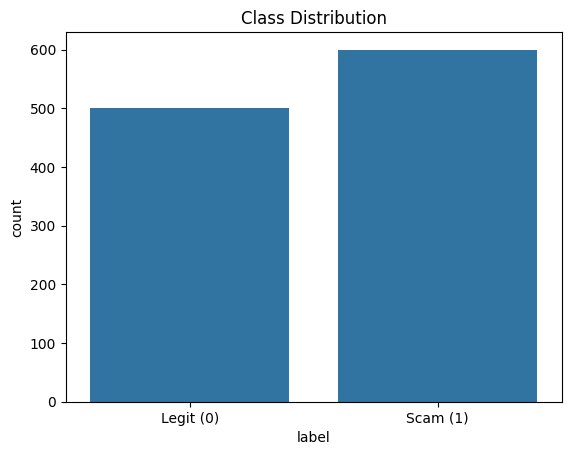

In [6]:

# Class distribution
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Legit (0)', 'Scam (1)'])
plt.title("Class Distribution")
plt.show()


### Most common words in scam messages(Top 10)

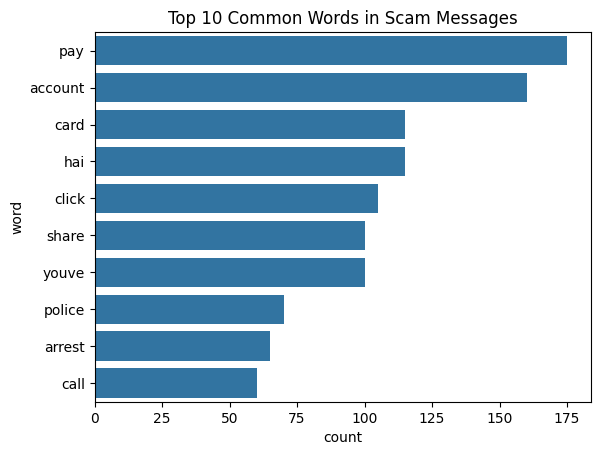

In [7]:
from collections import Counter

scam_words = " ".join(df[df['label'] == 1]['clean_message']).split()
common_words = Counter(scam_words).most_common(10)

# Convert to DataFrame for plotting
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

sns.barplot(data=word_df, x='count', y='word')
plt.title("Top 10 Common Words in Scam Messages")
plt.show()


### Message length comparison

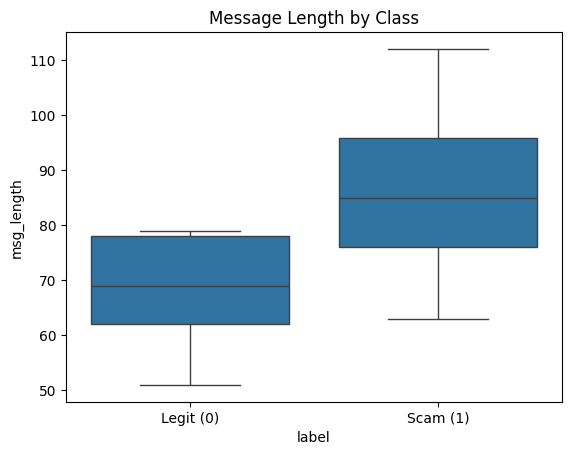

In [8]:
df['msg_length'] = df['message'].apply(len)

# Boxplot of message lengths
sns.boxplot(data=df, x='label', y='msg_length')
plt.xticks([0, 1], ['Legit (0)', 'Scam (1)'])
plt.title("Message Length by Class")
plt.show()


### Wordcloud for visual insight

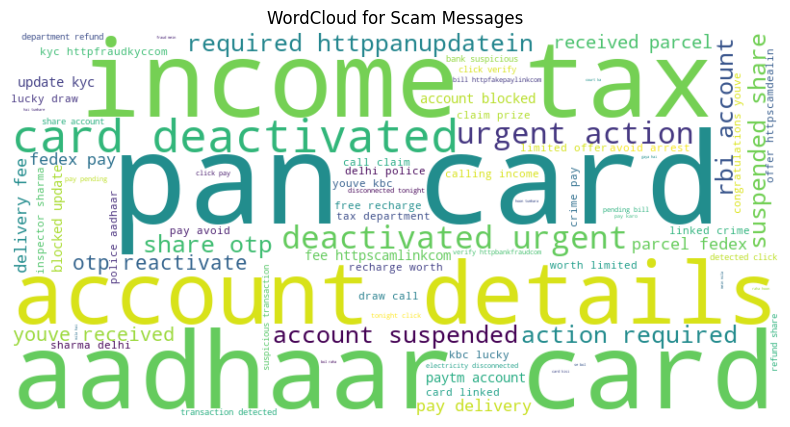

In [10]:
scam_text = " ".join(df[df['label'] == 1]['clean_message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(scam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Scam Messages")
plt.show()


### Compare Scam vs Legit Words

In [11]:
from collections import Counter

# Join all scam messages into one big string, then split into words
scam_words = " ".join(df[df['label'] == 1]['clean_message']).split()
legit_words = " ".join(df[df['label'] == 0]['clean_message']).split()

# Count the frequency of each word
top_scam = Counter(scam_words).most_common(10)
top_legit = Counter(legit_words).most_common(10)


In [12]:

scam_df = pd.DataFrame(top_scam, columns=['word', 'scam_count'])
legit_df = pd.DataFrame(top_legit, columns=['word', 'legit_count'])


In [13]:
# Merge on Word
merged = pd.merge(scam_df, legit_df, on='word', how='outer').fillna(0)


In [14]:
#Reshape for Plotting
melted = merged.melt(id_vars='word', value_vars=['scam_count', 'legit_count'], 
                     var_name='type', value_name='count')


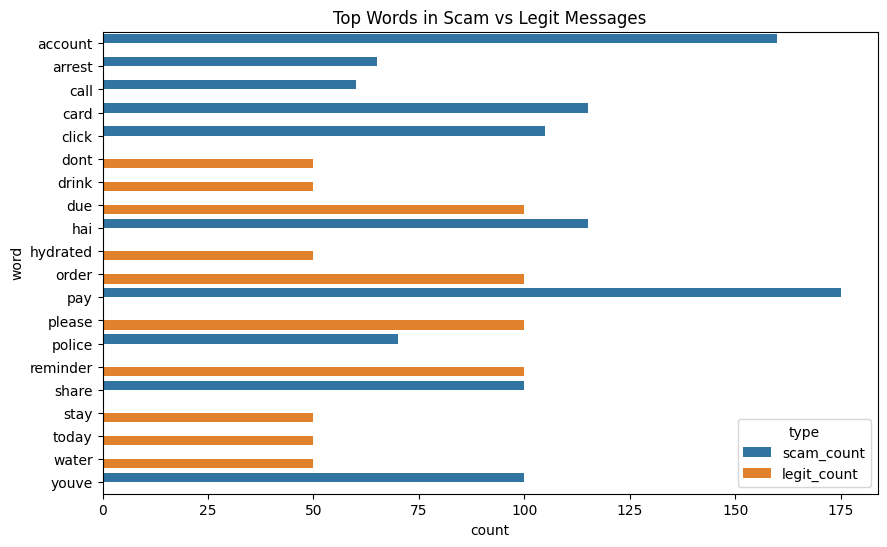

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='count', y='word', hue='type')
plt.title("Top Words in Scam vs Legit Messages")
plt.savefig("Top_Words_in_Scam_vs_Legit_Messages.png", dpi=300, bbox_inches='tight')

### Vectorize the Cleaned Text

In [23]:
# Use CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

# Target labels
y = df['label']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
nb_model = MultinomialNB()  
nb_model.fit(X_train, y_train)


MultinomialNB()

In [31]:
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       128

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220


Confusion Matrix:
 [[ 92   0]
 [  0 128]]


In [32]:
# New test messages
new_msgs = [
    "This is Delhi Police. Your mobile number is under surveillance. Pay ₹5000 to clear your name.",
    "Your PAN card is linked with suspicious activity. Call 931xxxxxxx now to avoid arrest.",
    "Congratulations! You've been selected for a government Yojana. Click the link to verify now.",
    "Your Swiggy order has been picked up and will be delivered shortly.",
    "Dear customer, your electricity bill has been paid successfully. Thank you!"
]

# Clean messages the same way you cleaned training data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stopwords.words("english")]
    return " ".join(filtered)

cleaned_new = [clean_text(msg) for msg in new_msgs]

# Transform using your trained vectorizer
X_new = vectorizer.transform(cleaned_new)

# Predict
preds = nb_model.predict(X_new)

# Show results
for msg, label in zip(new_msgs, preds):
    print(f"\nMessage: {msg}")
    print("Prediction:", "🚨 Scam" if label == 1 else "✅ Legit")



Message: This is Delhi Police. Your mobile number is under surveillance. Pay ₹5000 to clear your name.
Prediction: 🚨 Scam

Message: Your PAN card is linked with suspicious activity. Call 931xxxxxxx now to avoid arrest.
Prediction: 🚨 Scam

Message: Congratulations! You've been selected for a government Yojana. Click the link to verify now.
Prediction: 🚨 Scam

Message: Your Swiggy order has been picked up and will be delivered shortly.
Prediction: ✅ Legit

Message: Dear customer, your electricity bill has been paid successfully. Thank you!
Prediction: ✅ Legit


## Using TF-IDF + Logistic Regression

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Vectorize using TF-IDF instead of CountVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_message'])

# Labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       128

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220


Confusion Matrix:
 [[ 92   0]
 [  0 128]]


##  Cross-Validation & Model Comparison

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np


In [35]:
# Cross-validation (5-fold)
nb_scores = cross_val_score(nb_model, X_tfidf, y, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X_tfidf, y, cv=5, scoring='accuracy')

# Show results
print("Naive Bayes Cross-Validation Accuracy:", nb_scores)
print("Naive Bayes Mean Accuracy:", np.mean(nb_scores))

print("\nLogistic Regression Cross-Validation Accuracy:", lr_scores)
print("Logistic Regression Mean Accuracy:", np.mean(lr_scores))

Naive Bayes Cross-Validation Accuracy: [1. 1. 1. 1. 1.]
Naive Bayes Mean Accuracy: 1.0

Logistic Regression Cross-Validation Accuracy: [1. 1. 1. 1. 1.]
Logistic Regression Mean Accuracy: 1.0
